## Exercici 1
Descarrega el dataset adjunt de dades oficials de la UEFA i selecciona un atribut del conjunt de dades.
Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import shapiro
df = pd.read_csv(r'C:\Users\nuria\Documents\LliguesUEFA.csv',  encoding='latin-1', sep =';')
df

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Manchester City,ENG,1,37,28,6,3,96,24,...,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
1,2,Liverpool,ENG,2,36,26,8,2,89,24,...,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,...,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,...,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
4,5,Paris S-G,FRA,1,37,25,8,4,85,36,...,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,94,Bordeaux,FRA,20,37,5,13,19,48,89,...,28,0.76,41.3,68.5,-27.2,-0.73,D L L L D,22083,Hwang Ui-jo - 11,Benoît Costil
94,95,Venezia,ITA,20,37,6,8,23,34,69,...,26,0.70,35.4,70.5,-35.1,-0.95,L L L W D,6705,Thomas Henry - 9,Sergio Romero
95,96,Watford,ENG,19,37,6,5,26,33,75,...,23,0.62,37.8,64.1,-26.3,-0.71,L L L D L,20614,Emmanuel Dennis - 10,Ben Foster
96,97,Norwich City,ENG,20,37,5,7,25,23,79,...,22,0.59,33.0,73.3,-40.4,-1.09,L L L L D,26826,Teemu Pukki - 11,Tim Krul


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rk               98 non-null     int64  
 1   Squad            98 non-null     object 
 2   Country          98 non-null     object 
 3   LgRk             98 non-null     int64  
 4   MP               98 non-null     int64  
 5   W                98 non-null     int64  
 6   D                98 non-null     int64  
 7   L                98 non-null     int64  
 8   GF               98 non-null     int64  
 9   GA               98 non-null     int64  
 10  GD               98 non-null     int64  
 11  Pts              98 non-null     int64  
 12  Pts/G            98 non-null     float64
 13  xG               98 non-null     float64
 14  xGA              98 non-null     float64
 15  xGD              98 non-null     float64
 16  xGD/90           98 non-null     float64
 17  Last 5           9

 -    Squad : equipo
 -    Country : país
 -    LgRk: Ranking en la liga de su país
 -    MP: partidos jugados
 -    W :partidos ganados
 -    D: partidos empatados
 -    L: partidos perdidos
 -    GF: goles a favor 
 -    GA:goles en contra
 -   GD: diferencia de goles (goles a favor menos goles en contra)
 -   Pts: puntos 
 -   Pts/G: puntos promedio ganados por partido.
 -   xG: goles esperados
 -   xGA: goles esperados en contra
 -   xGD: disfrencia esperada de goles( goles esperados a favor menos goles esperados en contra)
 -   xGD/90
 -   Last 5: resultados ultimos 5 partidos 
 -   Attendance: espectadores 
 -   Top Team Scorer: jugados que ha marcado más goles 
 -   Goalkeeper: portero

In [3]:
df.isnull().sum()

Rk                 0
Squad              0
Country            0
LgRk               0
MP                 0
W                  0
D                  0
L                  0
GF                 0
GA                 0
GD                 0
Pts                0
Pts/G              0
xG                 0
xGA                0
xGD                0
xGD/90             0
Last 5             0
Attendance         0
Top Team Scorer    0
Goalkeeper         0
dtype: int64

In [4]:
df.isna().sum()

Rk                 0
Squad              0
Country            0
LgRk               0
MP                 0
W                  0
D                  0
L                  0
GF                 0
GA                 0
GD                 0
Pts                0
Pts/G              0
xG                 0
xGA                0
xGD                0
xGD/90             0
Last 5             0
Attendance         0
Top Team Scorer    0
Goalkeeper         0
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rk,98.0,49.500000,28.434134,1.00,25.250,49.50,73.750,98.00
LgRk,98.0,10.316327,5.706926,1.00,5.250,10.00,15.000,20.00
MP,98.0,36.306122,1.152390,34.00,36.000,37.00,37.000,37.00
W,98.0,13.448980,5.747474,3.00,9.000,13.00,17.000,28.00
D,98.0,9.408163,2.903381,3.00,7.000,9.00,11.000,16.00
L,98.0,13.448980,5.123470,2.00,10.000,13.00,17.000,26.00
GF,98.0,50.877551,16.102933,23.00,39.000,47.00,60.000,97.00
GA,98.0,50.877551,13.634602,24.00,40.000,50.00,59.000,89.00
GD,98.0,0.000000,26.501896,-56.00,-17.750,-1.00,17.250,72.00
Pts,98.0,49.734694,16.166371,18.00,37.000,46.00,61.750,90.00


- Disttribución normal de la muestra gráfico
- z-score (also called a standard score) gives you an idea of how far from the mean a data point is
- null hipotesis
- alternative hipo
- prueba estadistica
- p-value
- Wilcoxon 


Definimos la hipótesis nula (H0) y la hipótesis alternativa (H1).

In [6]:
H0 = "La muestra de los partidos jugados no sigue una distribución normal"
H1 = "La muestra de los partidos jugados sigue una distribución normal"

Comprovamos si la variable seleccionada tiene una distribución normal.

In [11]:
datos = df['MP']

stat, p = shapiro(datos)

alpha = 0.05
if p > alpha:
    print("Los datos parecen seguir una distribución normal.")
else:
    print("Los datos no siguen una distribución normal.")

Los datos no siguen una distribución normal.


<Axes: xlabel='MP', ylabel='Density'>

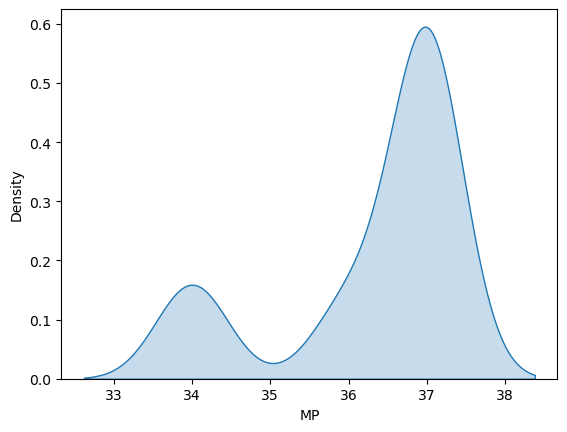

In [12]:
sns.kdeplot(df,x= 'MP', fill=True)

## Exercici 2
Amb el mateix dataset selecciona dos altres atributs del conjunt de dades.
Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.

Definimos la hipótesis nula (H0) y la hipótesis alternativa (H1) y comprobamos si los datos de las variables siguen una distribución normal

In [13]:
H0 = "los equipo que han marcado más goles no son los que han ganado más partidos"
H1 = "los equipo que han marcado más goles son los que han ganado más partidos."

stat, p = shapiro(df['W'])

alpha = 0.05
if p > alpha:
    print("Los datos parecen seguir una distribución normal.")
else:
    print("Los datos no siguen una distribución normal.")

Los datos no siguen una distribución normal.


In [14]:
stat, p = shapiro(df['GF'])

alpha = 0.05
if p > alpha:
    print("Los datos parecen seguir una distribución normal.")
else:
    print("Los datos no siguen una distribución normal.")

Los datos no siguen una distribución normal.


Las variables seleccionas no siguen una distribución normal por lo que no podemos usar el Test de Correlació de Pearson pero se puede usar el Test de Spearman para conocer la correlación existente.

In [15]:
correlation, p_value = stats.spearmanr(df['GF'], df['W'])

alfa = 0.05

if p_value < alfa:
    print("Hay evidencia de correlación significativa entre los goles marcados y los partidos ganados.")
else:
    print("No hay evidencia suficiente para afirmar una correlación significativa.")

Hay evidencia de correlación significativa entre los goles marcados y los partidos ganados.


## Exercici 3
Continua amb el conjunt de dades adjunt i selecciona tres atributs del conjunt de dades.
Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

Definimos la hipótesis nula (H0) y la hipótesis alternativa (H1) y comprobamos si la variable 'Attendance' es gausiana.(la otras dos variable ya estan comprobadas en el ejercicio anterior)

In [16]:
H0 = "los equipo que marcan más goles y ganan más partidos no son los que tienen más espectadores"
H1 = "los equipo que marcan más goles y ganan más partidos son los que tienen más espectadores"

stat, p = shapiro(df['Attendance'])

alpha = 0.05
if p > alpha:
    print("Los datos parecen seguir una distribución normal.")
else:
    print("Los datos no siguen una distribución normal.")

Los datos no siguen una distribución normal.


Ninguna de las varianles sigue una distribución normal.

In [19]:
stat2, p2 = stats.spearmanr(df['GF'], df['Attendance'])
stat3, p3 = stats.spearmanr(df['W'], df['Attendance'])

alpha = 0.05

if p2 < alpha and p3 < alpha:
    print("Se rechaza la hipótesis nula (H0). Existe una correlación significativa ")
else:
    print("No se rechaza la hipótesis nula (H0). No se encontró evidencia de correlación significativa entre las variables.")

Se rechaza la hipótesis nula (H0). Existe una correlación significativa 


<Axes: >

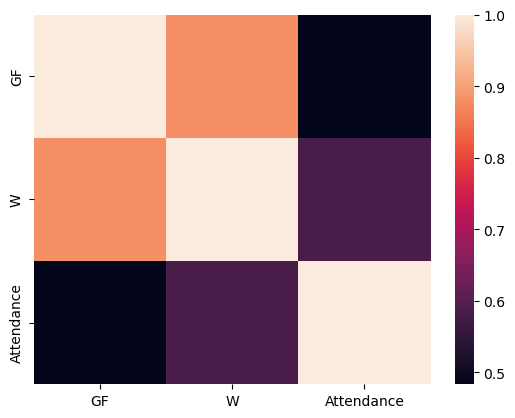

In [20]:
sns.heatmap(df[['GF', 'W','Attendance']].corr())